# 문제
1. corona.csv 파일 로드
2. Unnamed : 0 컬럼을 삭제
3. 컬럼을 첫번째부터 세번째까지 컬럼만 두고 전부 삭제
4. 컬럼의 이름 변경 ["등록일시", "누적사망자", "누적확진자"]
5. 등록일시를 기준으로 오름차순 정렬
6. 일일확진자와 일일사망자 파생변수 생성(결측치는 0으로 대체)
7. 일일확진자가 음수인 값을 삭제
8. 등록일시를 시계열로 변경하고 인덱스로 변경
9. 요일이라는 파생변수를 만들어서 요일을 대입
10. 요일컬럼 -> 월, 1-> 화, ..., 6 -> 일 형태로 변경
11. 요일별 일일 확진자의 평균을 바 그래프로 표시
12. 요일별 일일 사망자의 평균을 바 그래프로 표시

In [123]:
import pandas as pd

In [124]:
# 1. corona.csv 파일 로드
df = pd.read_csv("../csv/corona.csv")
df.head(1)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN


In [125]:
# 2. Unnamed : 0 컬럼을 삭제
df = df.drop(["Unnamed: 0"], axis = 1)
df.head(1)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN


In [126]:
# 3. 컬럼을 첫번째부터 세번째까지 컬럼만 두고 전부 삭제
df = df[["createDt", "deathCnt", "decideCnt"]]
df.head(1)

,createDt,deathCnt,decideCnt
0,2022-06-08 09:09:05.982,24305,18188200


In [127]:
# 4. 컬럼의 이름 변경 ["등록일시", "누적사망자", "누적확진자"]
df.columns = ["등록일시", "누적사망자", "누적확진자"]
df.head(1)

,등록일시,누적사망자,누적확진자
0,2022-06-08 09:09:05.982,24305,18188200


In [128]:
# 5. 등록일시를 기준으로 오름차순 정렬
df = df.sort_values("등록일시").reset_index(drop = True)
df.head(1)

,등록일시,누적사망자,누적확진자
0,2020-03-10 00:00:00.000,54,7513


In [129]:
# 6. 일일확진자와 일일사망자 파생변수 생성(결측치는 0으로 대체)
df["일일확진자"] = df["누적확진자"] - df["누적확진자"].shift(1)
df.head()

,등록일시,누적사망자,누적확진자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,NaN
1,2020-03-11 00:00:00.000,60,7755,242.0
2,2020-03-12 00:00:00.000,66,7869,114.0
3,2020-03-13 00:00:00.000,67,7979,110.0
4,2020-03-14 00:00:00.000,72,8086,107.0


In [130]:
df["일일확진자"] = df["일일확진자"].fillna(0)
df.head()

,등록일시,누적사망자,누적확진자,일일확진자
0,2020-03-10 00:00:00.000,54,7513,0.0
1,2020-03-11 00:00:00.000,60,7755,242.0
2,2020-03-12 00:00:00.000,66,7869,114.0
3,2020-03-13 00:00:00.000,67,7979,110.0
4,2020-03-14 00:00:00.000,72,8086,107.0


In [131]:
df["일일사망자"] = df["누적사망자"] - df["누적사망자"].shift(1)
df.head()

,등록일시,누적사망자,누적확진자,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,0.0,NaN
1,2020-03-11 00:00:00.000,60,7755,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,107.0,5.0


In [132]:
df["일일사망자"] = df["일일사망자"].fillna(0)
df.head()

,등록일시,누적사망자,누적확진자,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,107.0,5.0


In [133]:
# 7. 일일확진자가 음수인 값을 삭제
df = df.loc[df["일일확진자"] >= 0]
df

,등록일시,누적사망자,누적확진자,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,107.0,5.0
...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,6172.0,20.0


In [134]:
# 8. 등록일시를 시계열로 변경하고 인덱스로 변경
df["등록일시"] = pd.to_datetime(df["등록일시"])
df.set_index("등록일시", inplace = True)
df.head()

,누적사망자,누적확진자,일일확진자,일일사망자
등록일시,,,,
2020-03-10,54,7513,0.0,0.0
2020-03-11,60,7755,242.0,6.0
2020-03-12,66,7869,114.0,6.0
2020-03-13,67,7979,110.0,1.0
2020-03-14,72,8086,107.0,5.0


In [135]:
# 9. 요일이라는 파생변수를 만들어서 요일을 대입
for i in df.index :
    df.loc[i, "요일"] = i.weekday()

df.head()

,누적사망자,누적확진자,일일확진자,일일사망자,요일
등록일시,,,,,
2020-03-10,54,7513,0.0,0.0,1.0
2020-03-11,60,7755,242.0,6.0,2.0
2020-03-12,66,7869,114.0,6.0,3.0
2020-03-13,67,7979,110.0,1.0,4.0
2020-03-14,72,8086,107.0,5.0,5.0


In [136]:
# 10. 요일컬럼 -> 월, 1-> 화, ..., 6 -> 일 형태로 변경
_list = df["요일"].astype(int).unique()

In [137]:
week_name = ["월", "화", "수", "목", "금", "토", "일"]

for i in _list :
    df.loc[df["요일"] == i, "요일"] = week_name[i]

In [138]:
df["요일"].value_counts()

화    118
수    118
금    117
토    117
일    117
목    116
월    116
Name: 요일, dtype: int64

In [139]:
df

,누적사망자,누적확진자,일일확진자,일일사망자,요일
등록일시,,,,,
2020-03-10 00:00:00.000,54,7513,0.0,0.0,화
2020-03-11 00:00:00.000,60,7755,242.0,6.0,수
2020-03-12 00:00:00.000,66,7869,114.0,6.0,목
2020-03-13 00:00:00.000,67,7979,110.0,1.0,금
2020-03-14 00:00:00.000,72,8086,107.0,5.0,토
...,...,...,...,...,...
2022-06-04 08:56:49.219,24238,18153814,12039.0,9.0,토
2022-06-05 08:53:19.426,24258,18163648,9834.0,20.0,일
2022-06-06 09:00:06.734,24279,18168670,5022.0,21.0,월


In [142]:
import matplotlib.pyplot as plt
import platform
if platform.system() == "Darwin" :
    plt.rc("font", family = "AppleGothic")
else :
    plt.rc("font", family = "Malgun Gothic")

<Axes: xlabel='요일'>

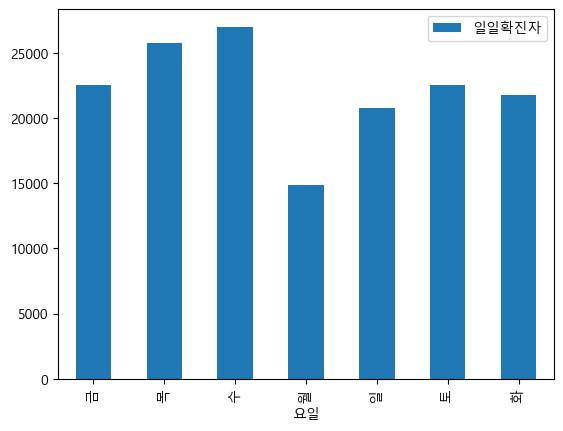

In [144]:
# 11. 요일별 일일 확진자의 평균을 바 그래프로 표시
pivot_data = pd.pivot_table(
    df,
    index = "요일",
    aggfunc = "mean", 
    values = "일일확진자"
)
pivot_data.plot.bar()

<Axes: xlabel='요일'>

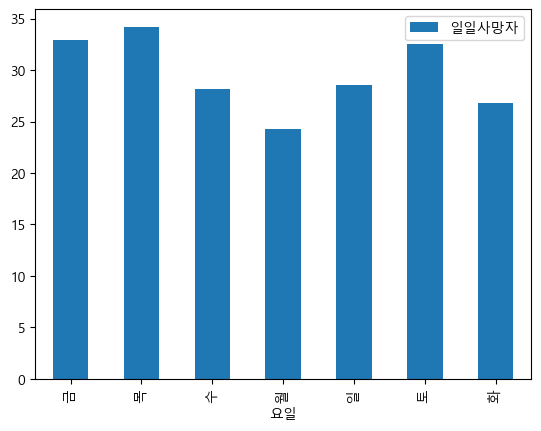

In [145]:
# 12. 요일별 일일 사망자의 평균을 바 그래프로 표시
pivot_data = pd.pivot_table(
    df,
    index = "요일",
    aggfunc = "mean", 
    values = "일일사망자"
)
pivot_data.plot.bar()